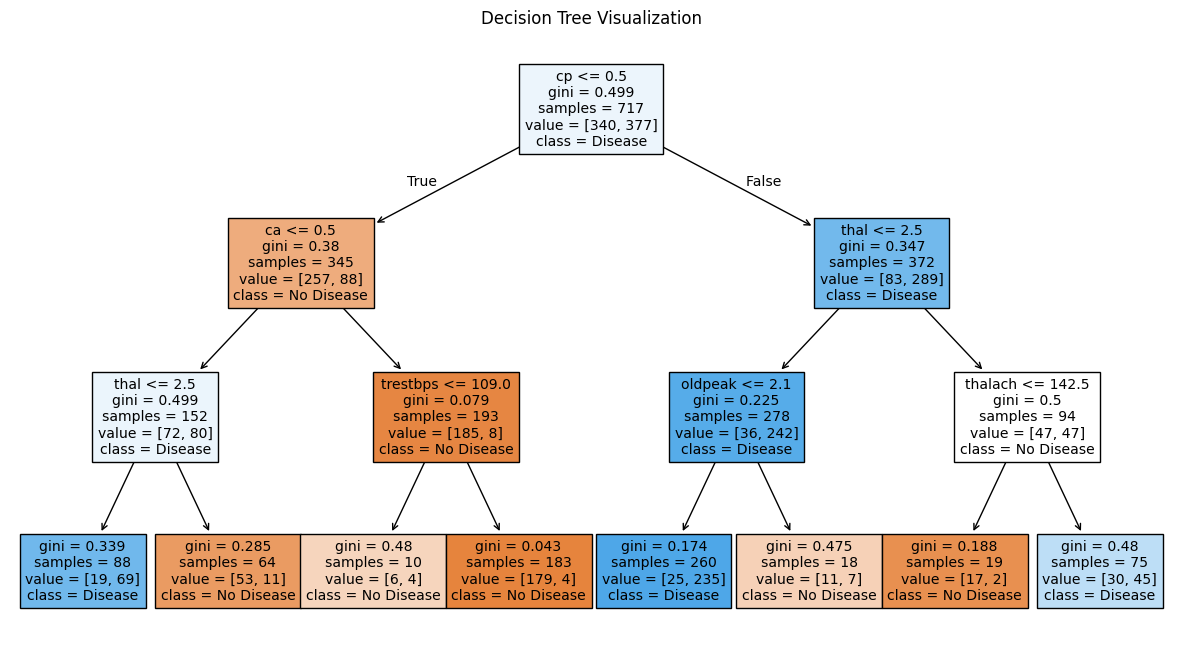


Overfitting Analysis for Decision Tree:
Depth 1 | Train Acc: 0.76 | Test Acc: 0.76
Depth 2 | Train Acc: 0.77 | Test Acc: 0.70
Depth 3 | Train Acc: 0.86 | Test Acc: 0.81
Depth 4 | Train Acc: 0.90 | Test Acc: 0.83
Depth 5 | Train Acc: 0.92 | Test Acc: 0.84

Random Forest Accuracy:
Train Accuracy: 1.0
Test Accuracy: 0.9805194805194806


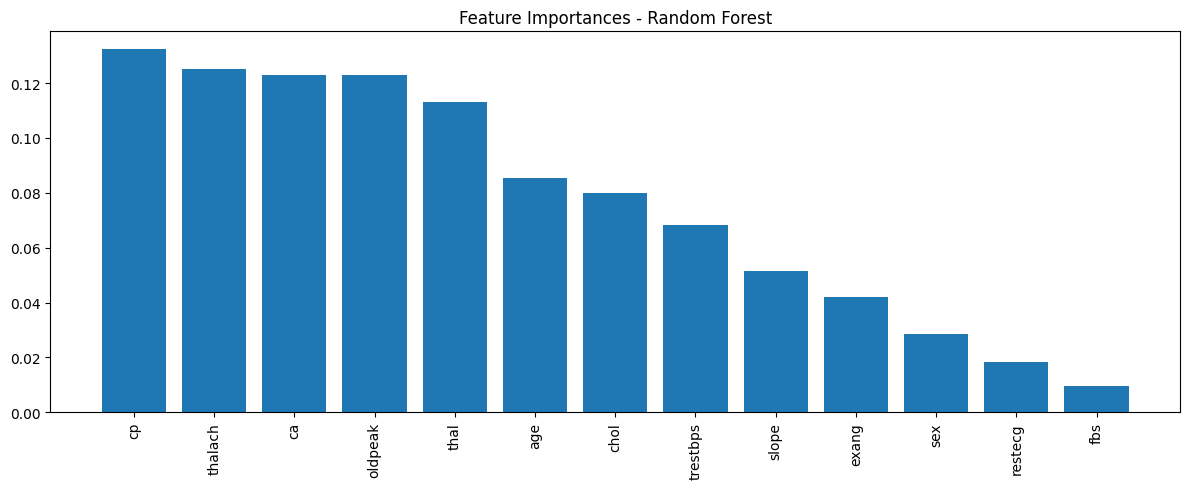


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df = pd.read_csv('heart.csv')  
X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)


plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


print("\nOverfitting Analysis for Decision Tree:")
for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Depth {depth} | Train Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f}")


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Accuracy Comparison
print("\nRandom Forest Accuracy:")
print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 5))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())
